In [1]:
import pandas as pd
import numpy as np
import scanpy as sc #pip install scanpy
import anndata
import scipy

import sys,os
import scvi

Global seed set to 0


In [2]:
import matplotlib
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.multitest import multipletests

sc.logging.print_header()
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.6 anndata==0.9.2 umap==0.5.4 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [3]:
adata = sc.read_h5ad('/home/jupyter/tmpmount/vasculature/cell/vas_subsampled_240430.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 78831 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pv

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


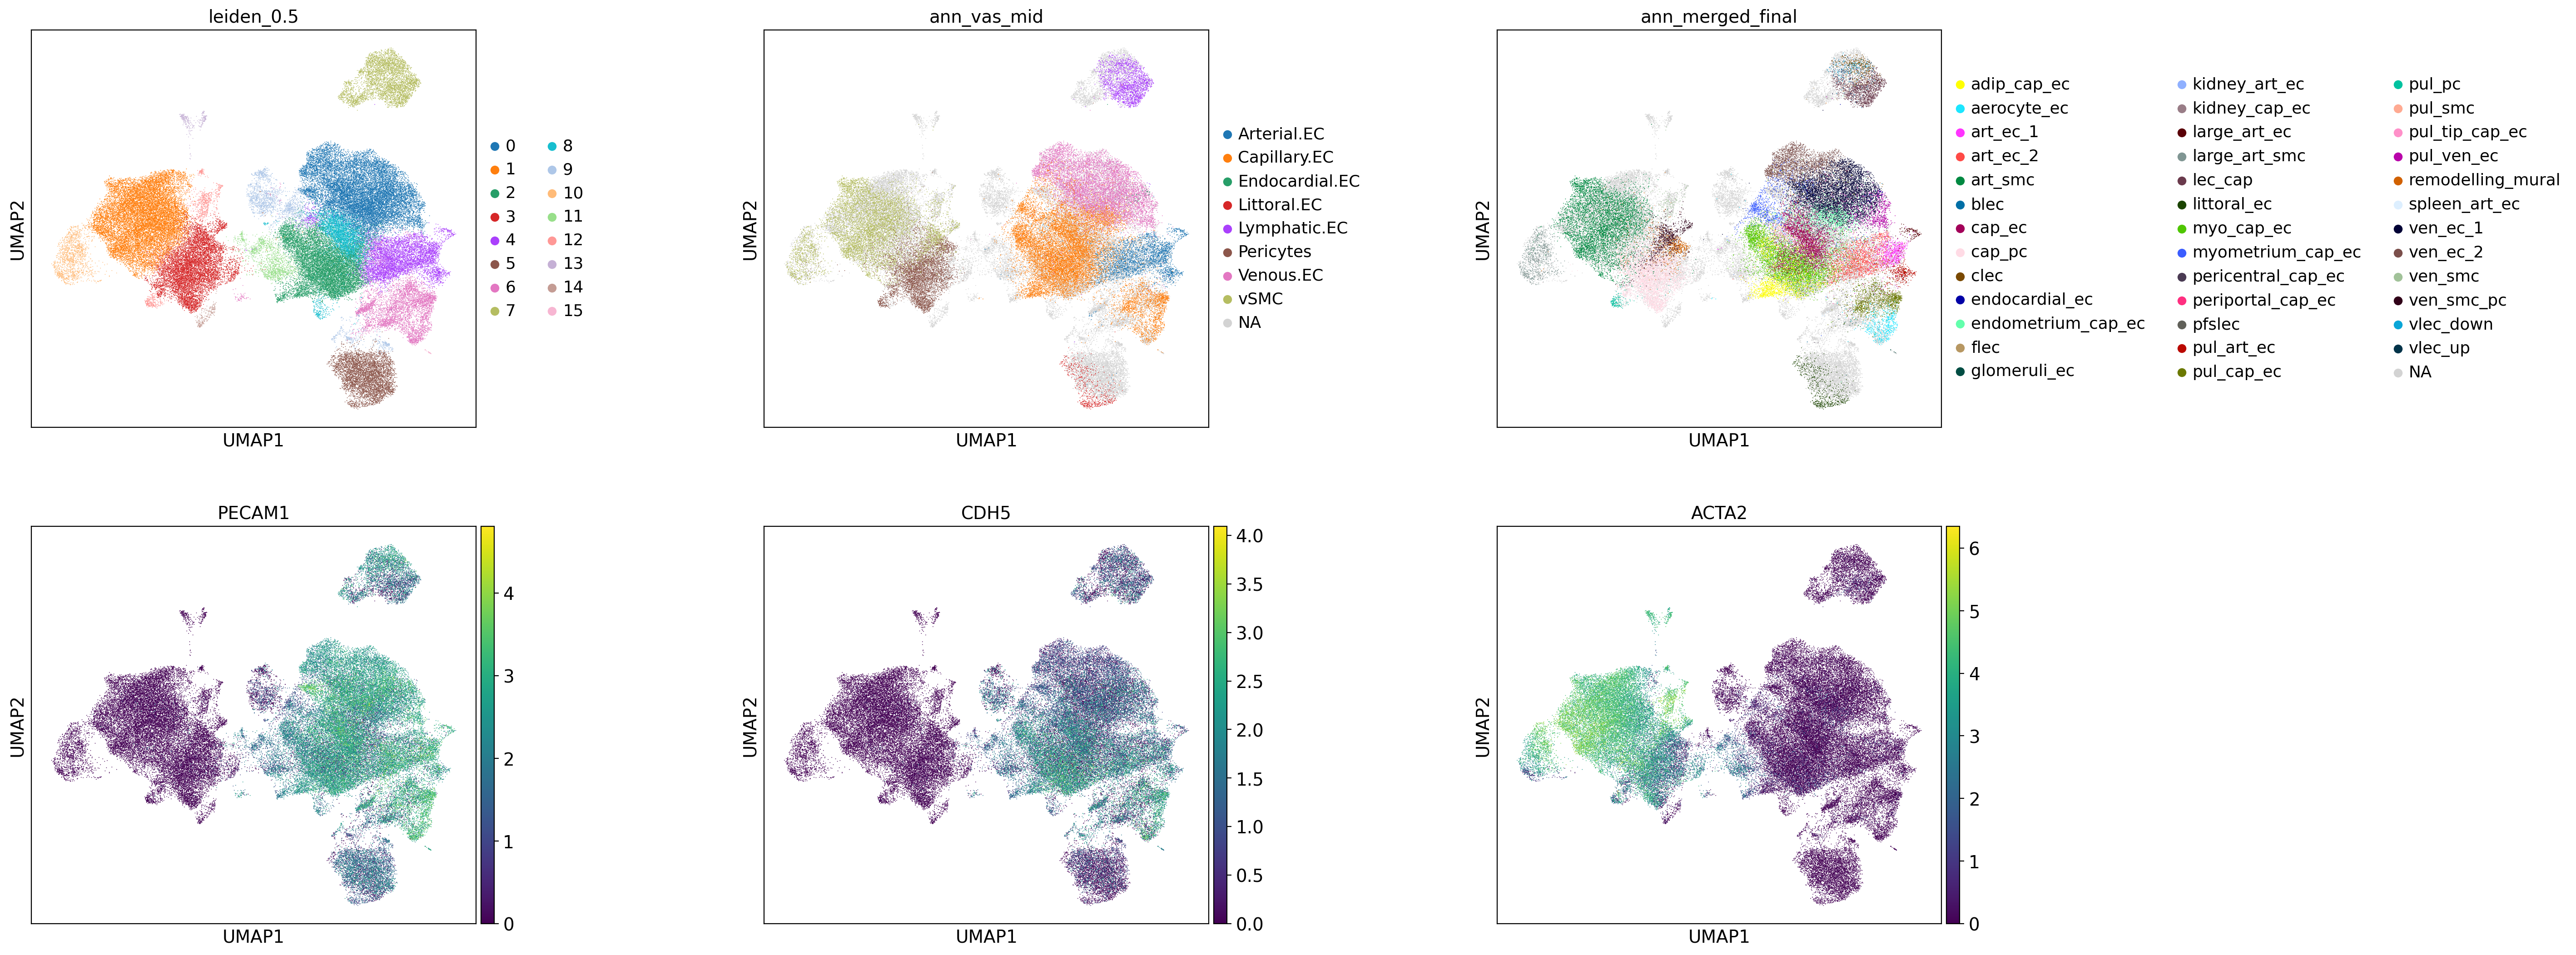

In [6]:
sc.pl.umap (adata, color = [ 'leiden_0.5',  'ann_vas_mid', 'ann_merged_final','PECAM1', 'CDH5', 'ACTA2'], ncols = 3, wspace = 0.5)

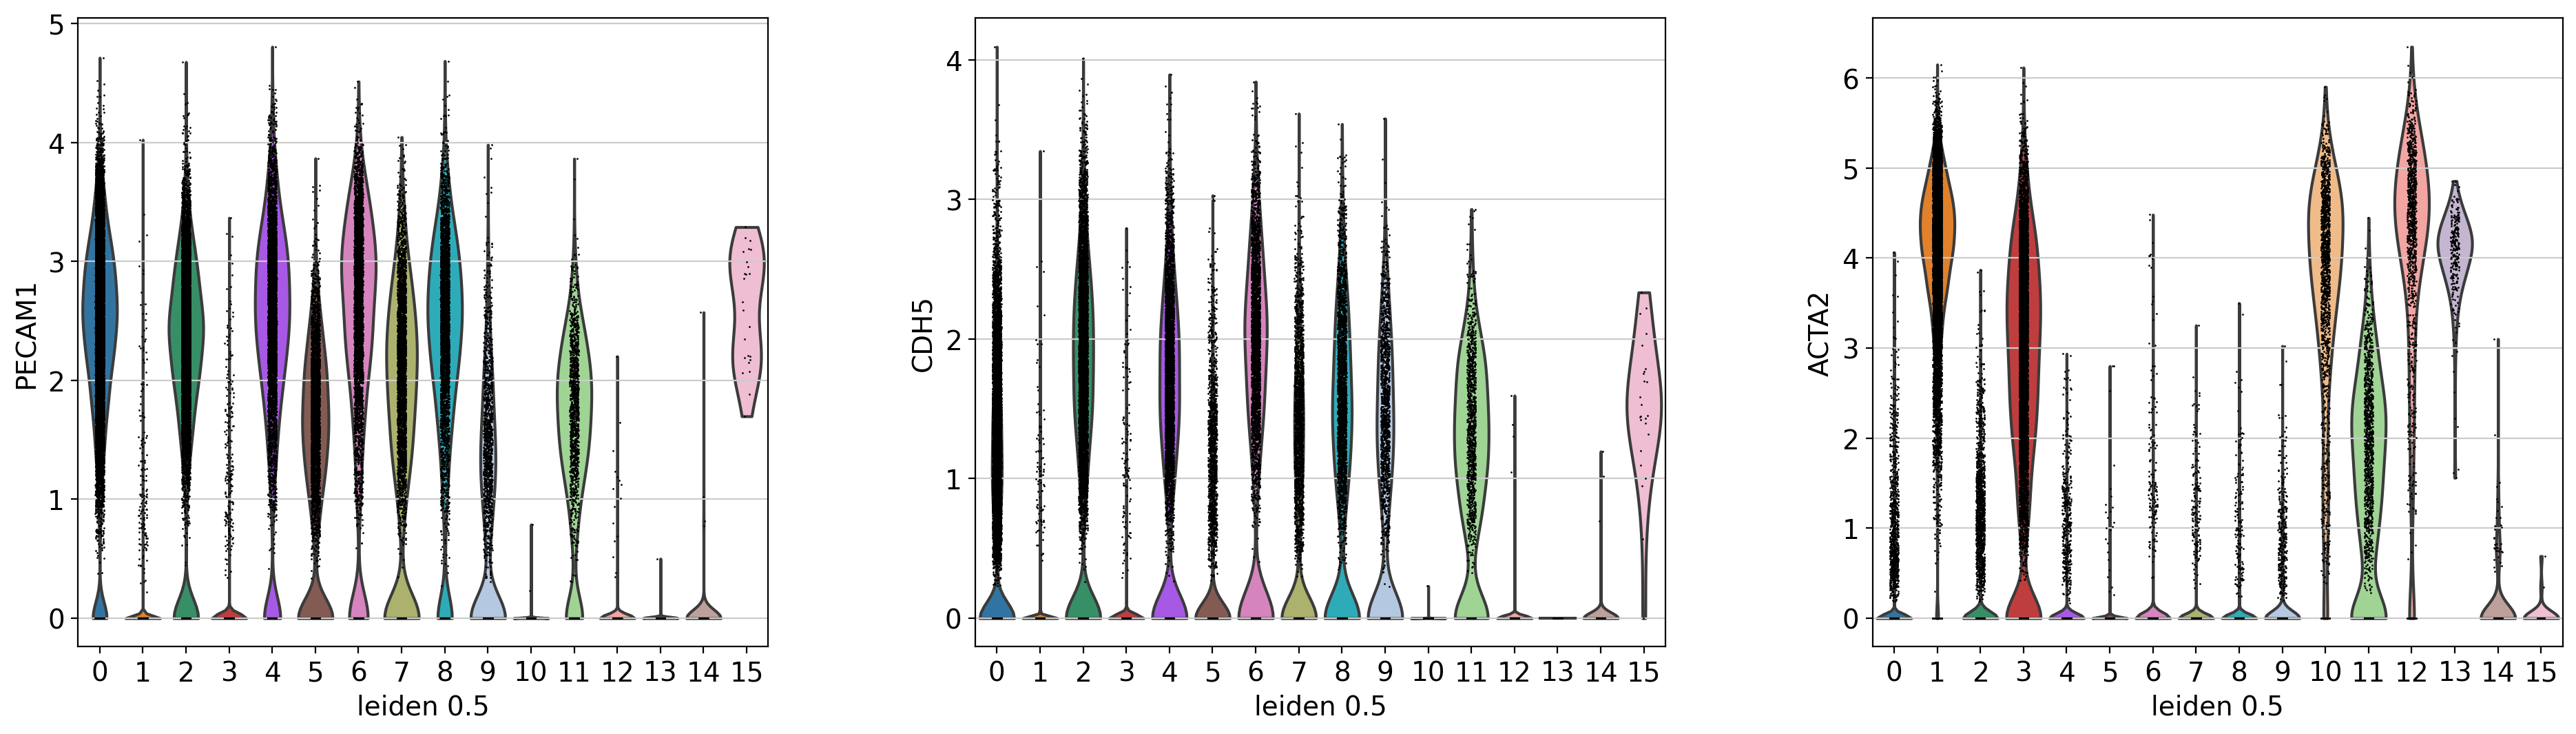

In [7]:
sc.pl.violin(adata, keys = ['PECAM1', 'CDH5', 'ACTA2'], groupby='leiden_0.5')

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


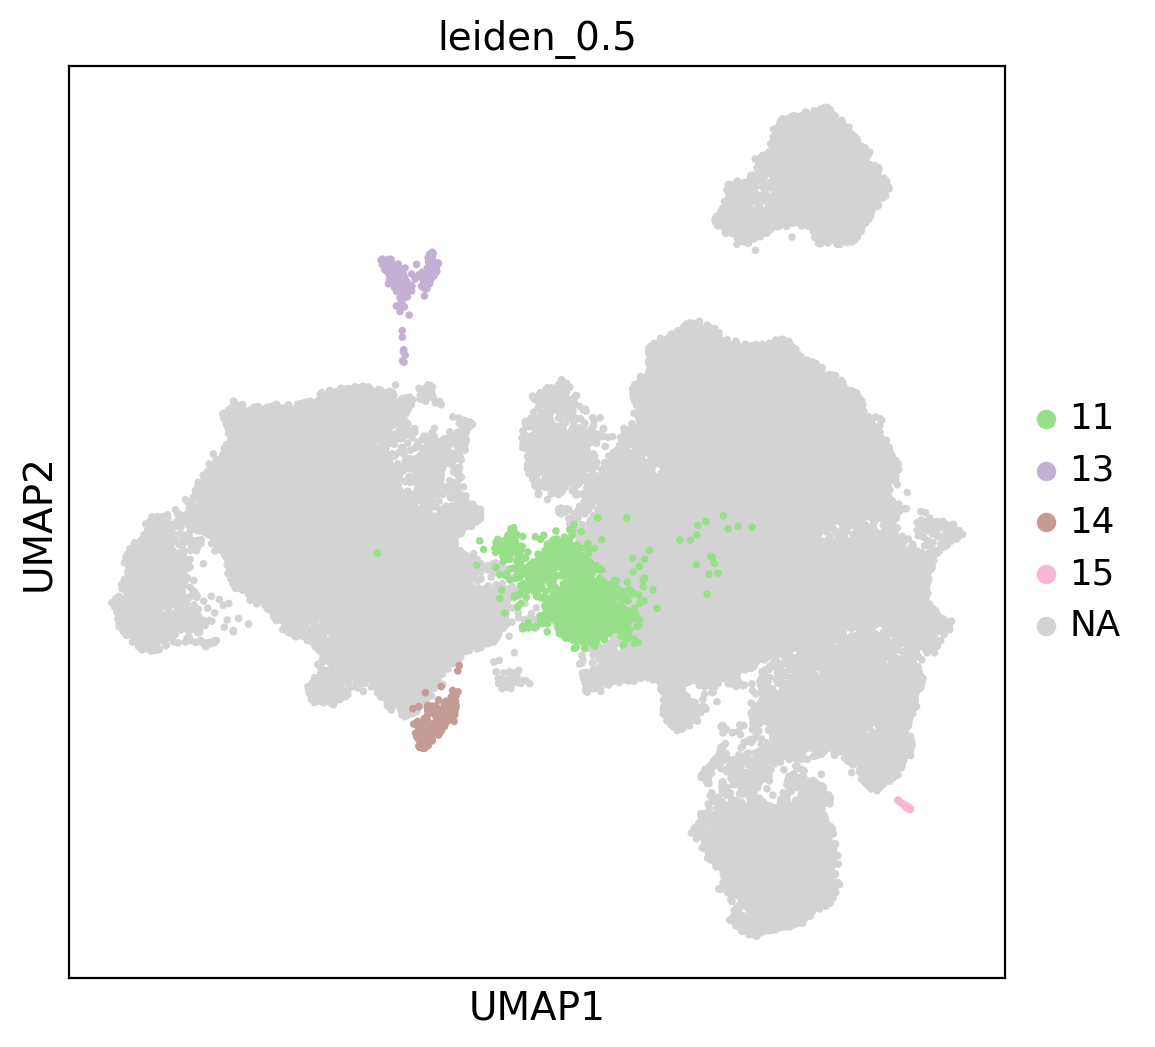

In [8]:
sc.pl.umap (adata, color = [ 'leiden_0.5'], groups=['11','13', '14', '15'], size = 30)

In [9]:
# this were ECs -> adata = adata[adata.obs['leiden_0.5'].isin(['0', '2', '4', '6', '8', '9', '11', '15'])] 
# 5 -> littoral EC
# 7 -> LEC

In [10]:
adata = adata[adata.obs['leiden_0.5'].isin(['7'])]


In [11]:
adata

View of AnnData object with n_obs × n_vars = 4232 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'dou

# n_layers = 1, n_latent = 10

In [12]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=1500,
    layer="counts",
    subset = True)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


In [13]:
adata

AnnData object with n_obs × n_vars = 4232 × 1500
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval

In [14]:
adata.var['highly_variable']

HES4       True
ISG15      True
TNFRSF4    True
MXRA8      True
HES5       True
           ... 
MT-CO3     True
MT-ND3     True
MT-ND4L    True
MT-ND4     True
MT-ND6     True
Name: highly_variable, Length: 1500, dtype: bool

In [15]:
adata.var_names

Index(['HES4', 'ISG15', 'TNFRSF4', 'MXRA8', 'HES5', 'TNFRSF9', 'ERRFI1',
       'ENO1', 'RBP7', 'NPPA',
       ...
       'EIF1AY', 'MT-ND1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3',
       'MT-ND4L', 'MT-ND4', 'MT-ND6'],
      dtype='object', length=1500)

In [16]:
#remove ribosomal, mitochondrial and cell cycle genes
mito_genes = list(adata.var_names[adata.var_names.isin([name for name in adata.var_names if name.startswith('MT-')])])
mito_genes

['MT-ND1',
 'MT-CO2',
 'MT-ATP8',
 'MT-ATP6',
 'MT-CO3',
 'MT-ND3',
 'MT-ND4L',
 'MT-ND4',
 'MT-ND6']

In [17]:
RP_genes = list(adata.var_names[adata.var_names.isin([name for name in adata.var_names if name.startswith('RP')])])
RP_genes
#adata=adata[:,~adata.var_names.isin(mito_genes)]
#adata=adata[:,~adata.var_names.isin(RP_genes)]

['RPS10', 'RPS20', 'RPL27A', 'RPLP0', 'RPS17', 'RPS4Y1']

In [18]:
adata

AnnData object with n_obs × n_vars = 4232 × 1500
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval

In [19]:
scvi.model.SCVI.setup_anndata(
    adata, 
    layer="counts", 
    batch_key="donor", 
    categorical_covariate_keys=['study','kit'], 
    continuous_covariate_keys=['total_counts', 'n_genes_by_counts','pct_counts_mt', 'pct_counts_rb'] #,'score_stress_genes''score_stress_genes' 'pct_counts_mt', 'pct_counts_rb','score_stress_genes'
)
vae = scvi.model.SCVI(adata, n_layers=1) #, n_latent=30
#scvi.data.view_anndata_setup(adata)
vae
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
adata.X.shape
sc.pp.neighbors(adata, use_rep="X_scVI")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/opt/conda/envs/scvi/lib/python3.8/site-packages/scvi/data/_utils.py:168: UserWarning: Category 1 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scvi/data/_utils.py:168: UserWarning: Category 5 in adata.obs['kit'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:27<00:00,  2.72it/s, loss=610, v_num=1]   
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [20]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


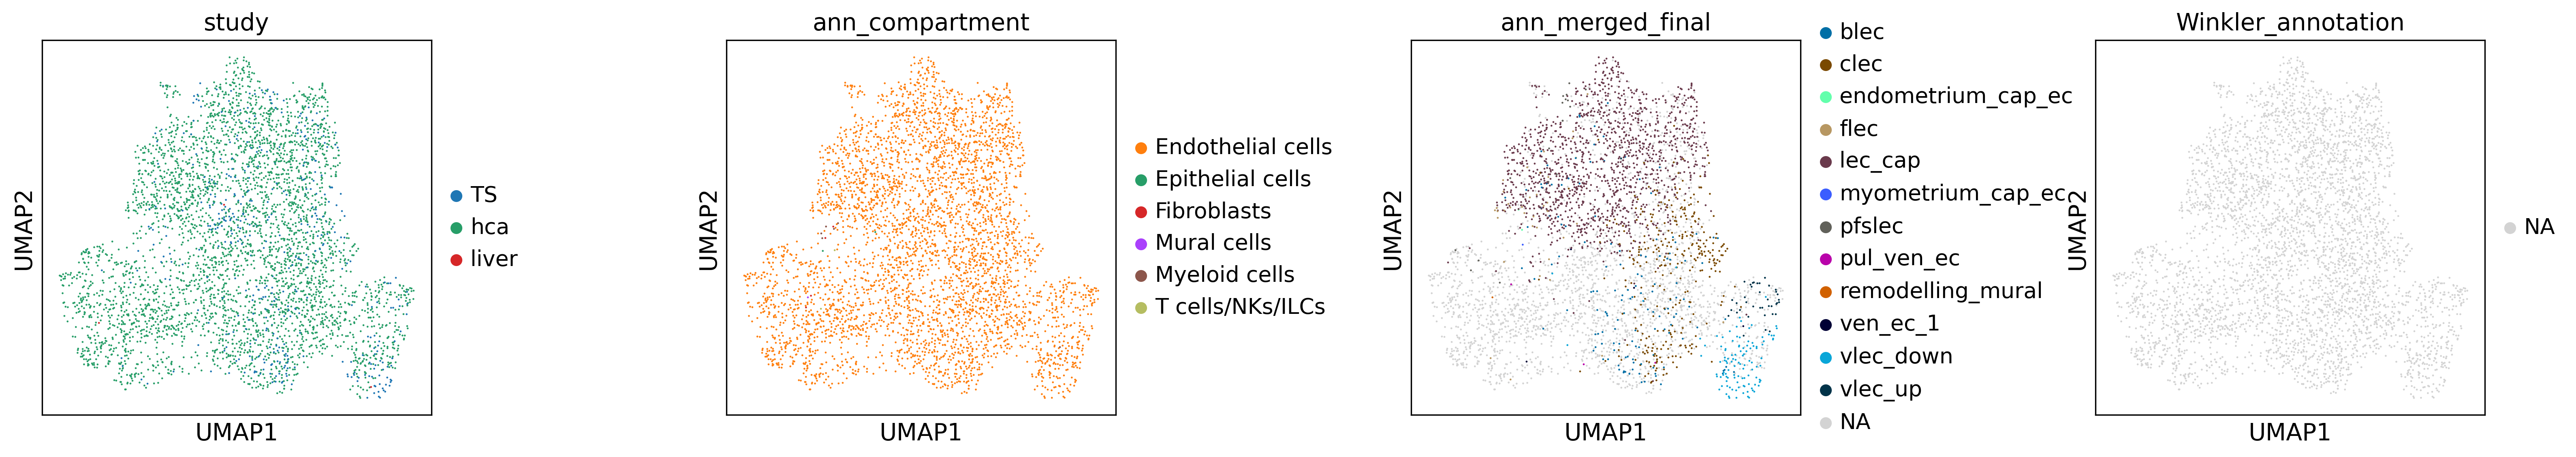

In [21]:
sc.settings.set_figure_params(dpi=150, facecolor='white')
sc.pl.umap(adata, color = ['study', 'ann_compartment', 'ann_merged_final', 'Winkler_annotation'], 
           wspace = 0.6, ncols = 4, size = 5)

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


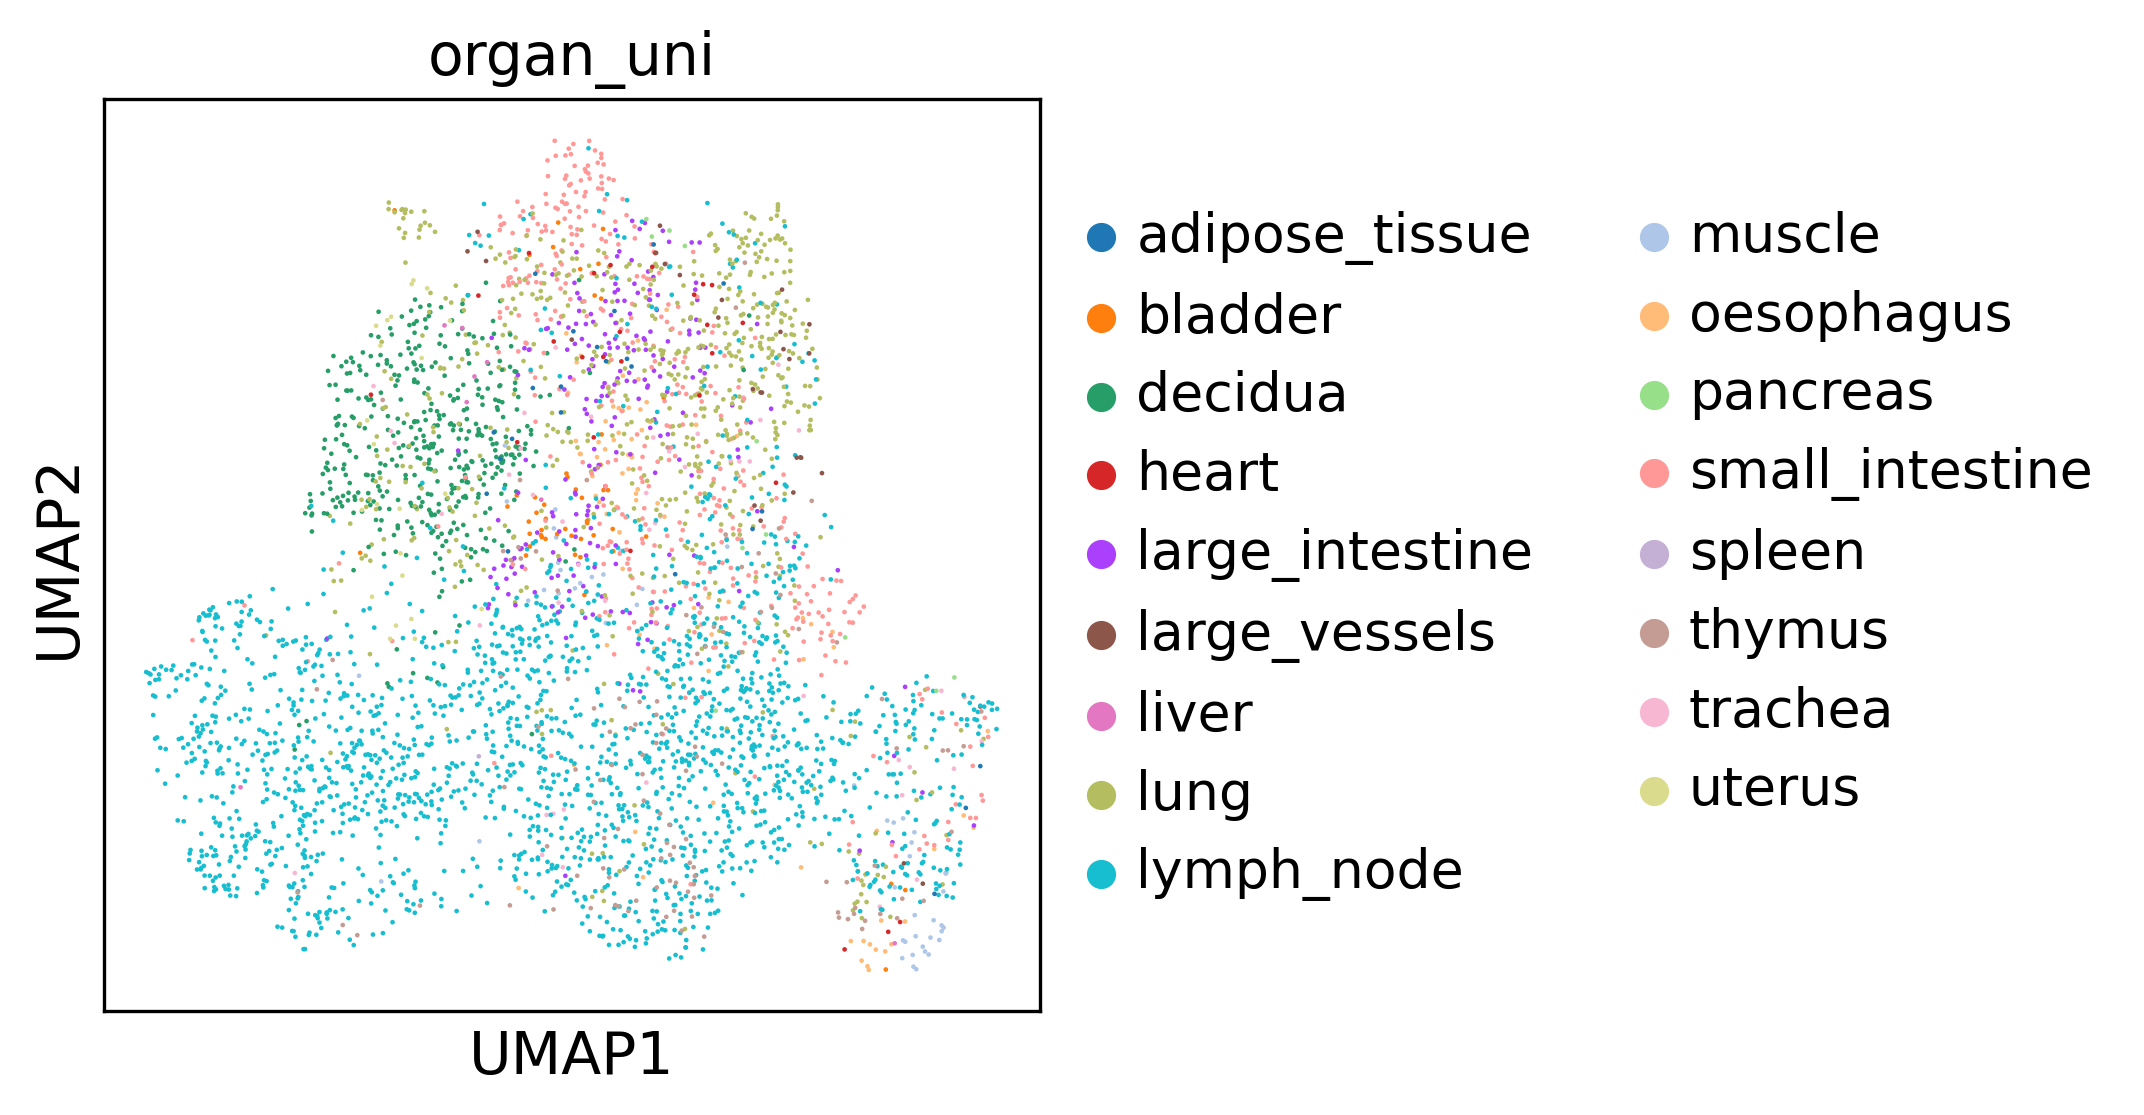

In [22]:
sc.settings.set_figure_params(dpi=150, facecolor='white')
sc.pl.umap(adata, color = ['organ_uni'],
           wspace = 0.6, ncols = 3, size = 5)

In [25]:
bdata = sc.read_h5ad('/home/jupyter/tmpmount/vasculature/cell/vas_subsampled_240430.h5ad')
bdata = bdata[bdata.obs['leiden_0.5'].isin(['7'])]

In [26]:
sc.pp.highly_variable_genes(
    bdata,
    flavor="seurat_v3",
    n_top_genes=1500,
    layer="counts",
    subset = False)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


In [27]:
bdata.obsm = adata.obsm
bdata.obsp = adata.obsp
bdata.obs = adata.obs
bdata.uns = adata.uns

In [ ]:
bdata.write('/home/jupyter/tmpmount/vasculature/cell/lec_240520_lat_10_layer_1.h5ad', compression='gzip')